In [1]:
import torch

/home/sofiaguerreiro/molecules-binding/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = torch.load("../../results/e8dc8b6c1c5346ca8e6910f2a1aa3d9c")

5 runs of NodeEdge with 3 message passing layers

In [10]:
results_respected_smelt_684 = torch.load("../../results/9e96927f1df74889aa948147c7560b14")
results_skillful_kite_793 = torch.load("../../results/6841e637b5874197a5ee5905f63e46bf")
results_angry_conch_149 = torch.load("../../results/5a3ebd44d0c9439e8d50784377359e16")
results_amazing_ant_814 = torch.load("../../results/739a450223b14d428445a707fde0d2f2")

In [37]:
results = results_respected_smelt_684

In [39]:
average_results = torch.stack([results_respected_smelt_684, results_skillful_kite_793,
results_angry_conch_149, results_amazing_ant_814]).mean(dim=0)

In [45]:
results = average_results

In [50]:
results

tensor([[ 5.7163,  8.5200],
        [ 5.2434,  5.1700],
        [ 8.3223,  9.5200],
        [ 8.7159, 11.0900],
        [ 6.3894,  5.6000],
        [ 5.5351,  5.9600],
        [ 6.0963,  4.7600],
        [ 5.9407,  6.6300],
        [ 4.0860,  4.0100],
        [ 6.6815,  6.1200],
        [ 4.3024,  2.8500],
        [ 4.9377,  5.2200],
        [ 3.3929,  3.2800],
        [ 5.1622,  2.8900],
        [ 5.8440,  8.8200],
        [ 6.0097,  7.3000],
        [ 7.4527,  8.6600],
        [ 6.8095,  6.3200],
        [ 6.6627,  5.9600],
        [ 4.2991,  5.2400],
        [ 7.4705,  5.1400],
        [ 6.4218,  5.2700],
        [ 5.1763,  5.9200],
        [ 5.2070,  6.9200],
        [ 8.1056,  7.9600],
        [ 6.6324, 10.1700],
        [ 6.2857,  6.8800],
        [ 5.2660,  4.1100],
        [ 4.7350,  4.4100],
        [ 7.5975,  7.8000],
        [ 2.3247,  2.2700],
        [ 8.7744,  9.5400],
        [ 4.0175,  2.9600],
        [ 5.9444,  5.9100],
        [ 5.5703,  6.0000],
        [ 6.8752,  6

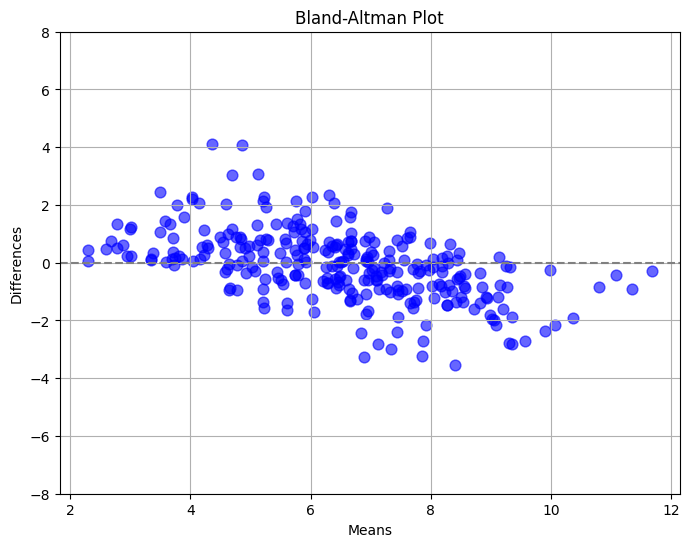

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Example input tensor
input_tensor = results

# Compute differences and means
differences = input_tensor[:, 0] - input_tensor[:, 1]
means = 0.5 * (input_tensor[:, 0] + input_tensor[:, 1])

# Create the Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(means, differences, c='blue', marker='o', s=60, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim(-8, 8)
plt.title("Bland-Altman Plot")
plt.xlabel("Means")
plt.ylabel("Differences")
plt.grid(True)
plt.show()


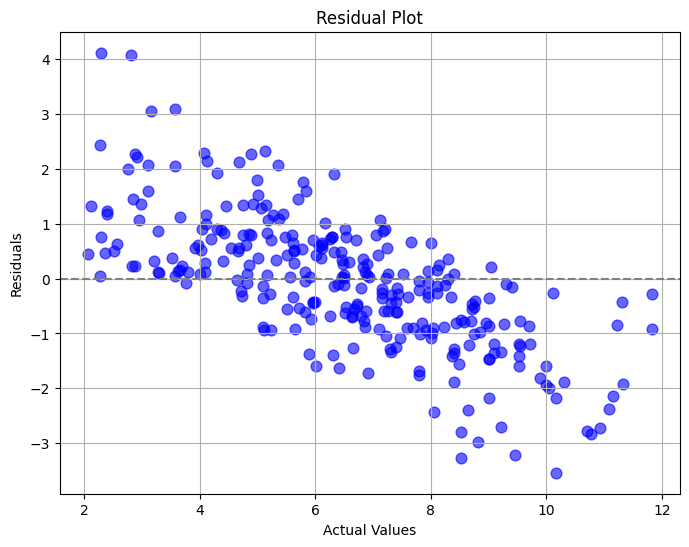

In [48]:
residuals = input_tensor[:, 0] - input_tensor[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], residuals, c='blue', marker='o', s=60, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

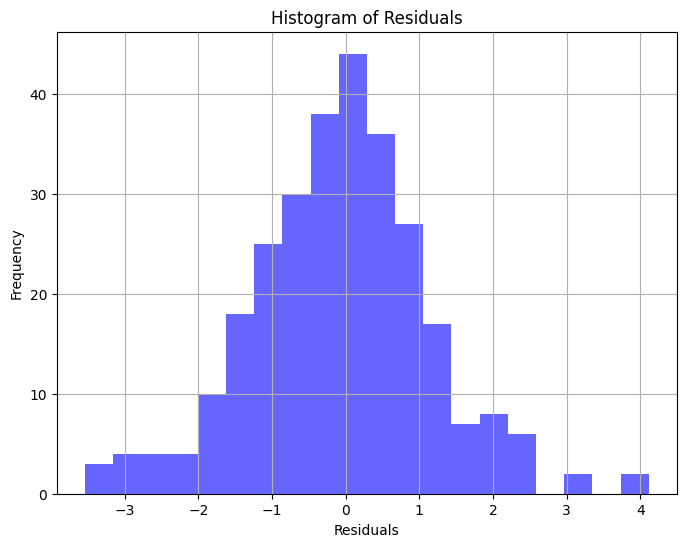

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

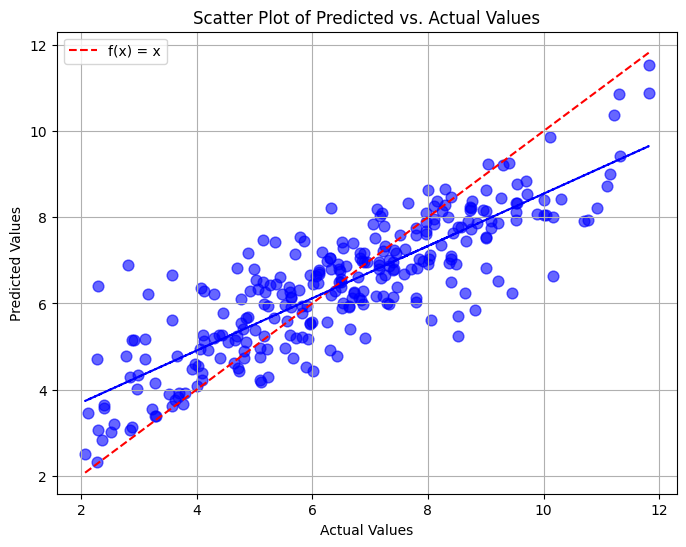

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], input_tensor[:, 0], c='blue', marker='o', s=60, alpha=0.6)
plt.plot([min(input_tensor[:, 1]), max(input_tensor[:, 1])], 
         [min(input_tensor[:, 1]), max(input_tensor[:, 1])], color='red', linestyle='--', label='f(x) = x')
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

z = np.polyfit(input_tensor[:, 1], input_tensor[:, 0], 1)
p = np.poly1d(z)
plt.plot(input_tensor[:, 1], p(input_tensor[:, 1]), "b--", label="fitted line")

plt.show()

In [46]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Example input tensor
input_tensor = results

# Calculate MAE, MSE, RMSE
differences = input_tensor[:, 0] - input_tensor[:, 1]
mae = torch.mean(torch.abs(differences))
mse = torch.mean(differences**2)
rmse = torch.sqrt(mse)

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate standard deviation
std_deviation = torch.std(differences)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")


MAE: 0.9156
MSE: 1.4476
RMSE: 1.2032
Pearson Correlation: 0.8417
Spearman Correlation: 0.8224
Standard Deviation: 1.2032
